# Find Distributions of Elderly Activity by Hour
#### Daniel Fay

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [56]:
tripSurvey = pd.read_csv('../Data/trip_survey.csv', index_col=0)

In [57]:
tripSurvey.columns

Index([u'SAMPN', u'PERNO', u'PERTYPE', u'ORIG_HOME', u'DEST_HOME', u'DOW_x',
       u'OTAZ', u'DTAZ', u'DTPURP', u'OTPURP_AGG', u'DTPURP_AGG',
       u'LTMODE_AGG', u'TRP_DEP_HR', u'TRP_DEP_MIN', u'TRP_ARR_HR',
       u'TRP_ARR_MIN', u'TRPDUR_R', u'ACTDUR', u'OTRACT', u'DTRACT', u'PMODE1',
       u'PMODE_R', u'PMODE_R2', u'PMODE_R3', u'WORK_PURP', u'DTPURP_R',
       u'ODTPURP', u'ODTPURP1', u'ODTPURP2', u'ODTPURP2_R', u'PLOC',
       u'WORKTRIP', u'TOD_R', u'TOD_PEAK', u'TRIPDIST_R1', u'TRIPDIST_R2',
       u'STYPE', u'CTFIP', u'INCOM_R', u'DOW_y', u'HHVEH', u'GENDER', u'AGE_R',
       u'LIC', u'RELAT', u'RACE', u'EMPLY', u'WORKS', u'WKSTAT', u'JOBS',
       u'WDAYS', u'INDUS', u'OCCUP', u'O_OCCUP', u'WLOC', u'WFIPS', u'WMODE',
       u'O_WMODE', u'TTTWS', u'CDRIV', u'WSTRT', u'WEND', u'STRVR', u'ENDVR',
       u'STUDE', u'work_flex_start', u'work_flex_end'],
      dtype='object')

In [58]:
tripSurvey = tripSurvey[['DTPURP', 'TRP_ARR_HR', 'AGE_R','OTRACT', 'DTRACT']]

In [59]:
tripSurvey.AGE_R.unique()

array(['35-54 years', '19-24 years', '16-18 years',
       'Younger than 16 years', '55-64 years', '65 years or older',
       '25-34 years'], dtype=object)

In [60]:
tripSurvey_sen = tripSurvey.loc[tripSurvey['AGE_R'] == '65 years or older']
tripSurvey_sen.head()

,DTPURP,TRP_ARR_HR,AGE_R,OTRACT,DTRACT
42,3,12.0,65 years or older,9.001205e+09,9.001200e+09
64,26,12.0,65 years or older,3.400302e+10,3.400302e+10
65,27,15.0,65 years or older,3.400302e+10,9.001030e+09
75,14,12.0,65 years or older,3.400302e+10,3.402301e+10
77,16,14.0,65 years or older,3.400302e+10,3.400301e+10


In [61]:
tripSurvey_sen_act = tripSurvey_sen.groupby(['DTPURP']).count()
tripSurvey_sen_act.reset_index(inplace=True)
tripSurvey_sen_act.sort_values('TRP_ARR_HR', ascending=False, inplace=True)

In [62]:
dtpurp = {1:'Working at Home (For Pay or Volunteer)', 2:'Shopping (Online, Catalog or by Phone)', 3:'Any Other Activities at Home', \
          4:'Change Travel Mode/Transfer', 5:'Dropped off Passenger from Car', 6:'Picked up Passenger from Car', \
         7:'Get Gas', 8:'Drive Through (ATM, Bank, Fast Food, etc.)', 9:'Work/Doing my Job', 10:'Other Work-Related Activities at Work', \
         11:'Volunteer Work/Activities', 12:'Attending Class/Studying', 13:'All Other Activities at School', 14:'Work-Related', \
         15:'Service Private Vehicle', 16:'Grocery/Food Shopping', 17:'Other Routine Shopping', 18:'Shopping for Major Purchases or Specialty Items', \
         19:'Household Errands', 20:'Personal Business', 21:'Eat Meal Out at Restaurant/Diner', 22:'Health Care', \
         23:'Civic or Religious Activities', 24:'Outdoor Recreation', 25:'Indoor Recreation', 26:'Entertainment', \
         27:'Social/Visit Friends/Relatives', 28:'Airport - Business', 29:'Airport - Personal', 96:'Loop Trip', 97:'Other (Specify)'}
tripSurvey_sen_act.DTPURP.replace(dtpurp, inplace=True)
tripSurvey_sen_act = tripSurvey_sen_act[['DTPURP','AGE_R']]
tripSurvey_sen_act.columns = ['Trip_Purpose', 'Count']
tripSurvey_sen_act.set_index('Trip_Purpose', inplace=True)
tripSurvey_sen_act.head()

,Count
Trip_Purpose,
Any Other Activities at Home,4287
Grocery/Food Shopping,1022
Other Routine Shopping,911
Health Care,716
Household Errands,659


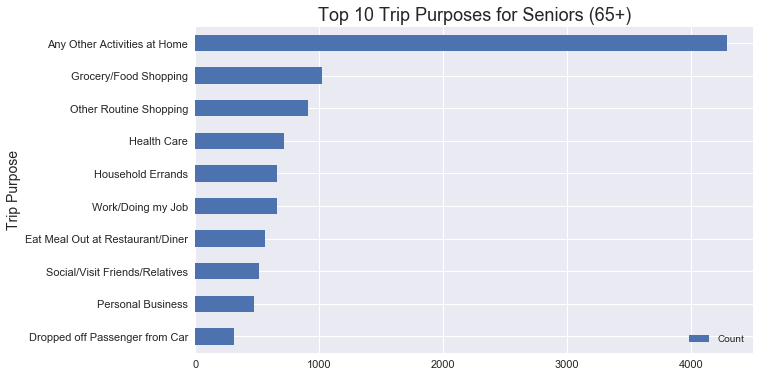

In [67]:
fig, ax = plt.subplots(figsize = (10,6))
tripSurvey_sen_act.head(10).sort_values('Count').plot.barh(fontsize=11, ax=ax)
ax.set_title('Top 10 Trip Purposes for Seniors (65+)', fontsize=18)
ax.set_ylabel('Trip Purpose', fontsize=14)